In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

Creating a Hypothetical Portfolio

In [2]:
# Dates
dates = pd.date_range('2023-01-01', periods=100)

# Fictional daily closing prices for 3 stocks
np.random.seed(0)  # For reproducible results
prices = np.random.rand(100, 3) * 100
tickers = ['AAPL', 'MSFT', 'GOOGL']

price_data = pd.DataFrame(prices, index=dates, columns=tickers)
price_data.head()

,AAPL,MSFT,GOOGL
2023-01-01,54.881350,71.518937,60.276338
2023-01-02,54.488318,42.365480,64.589411
2023-01-03,43.758721,89.177300,96.366276
2023-01-04,38.344152,79.172504,52.889492
2023-01-05,56.804456,92.559664,7.103606


Simulating Portfolio Weights (assume an equal investment in each stock.)

In [3]:
weights = np.array([1/3, 1/3, 1/3])

Calculating Portfolio Daily Returns

In [4]:
# Calculate daily returns
returns = price_data.pct_change()  # percentage change between the current and a prior element

# Calculate portfolio daily returns
portfolio_returns = returns.dot(weights)
portfolio_returns.head()

2023-01-01         NaN
2023-01-02   -0.114413
2023-01-03    0.466673
2023-01-04   -0.229030
2023-01-05   -0.071721
Freq: D, dtype: float64

Portfolio Performance Metrics

In [5]:
# Annualized return
annualized_return = portfolio_returns.mean() * 252

# Annualized volatility
annualized_volatility = portfolio_returns.std() * np.sqrt(252)

print("Annualized Return:", annualized_return)
print("Annualized Volatility:", annualized_volatility)

Annualized Return: 591.414411762954
Annualized Volatility: 101.5338731674626


Plotting Portfolio Performance

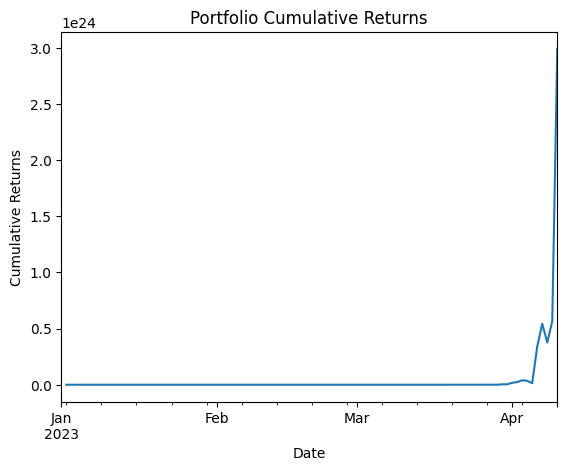

In [6]:
# Cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# Plotting
cumulative_returns.plot()
plt.title('Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

Monte Carlo simulation

In [7]:
price_data

,AAPL,MSFT,GOOGL
2023-01-01,54.881350,71.518937,60.276338
2023-01-02,54.488318,42.365480,64.589411
2023-01-03,43.758721,89.177300,96.366276
2023-01-04,38.344152,79.172504,52.889492
2023-01-05,56.804456,92.559664,7.103606
...,...,...,...
2023-04-06,14.814086,98.182939,47.837031
2023-04-07,49.739137,63.947252,36.858461
2023-04-08,13.690027,82.211773,18.984791
2023-04-09,51.131898,22.431703,9.784448


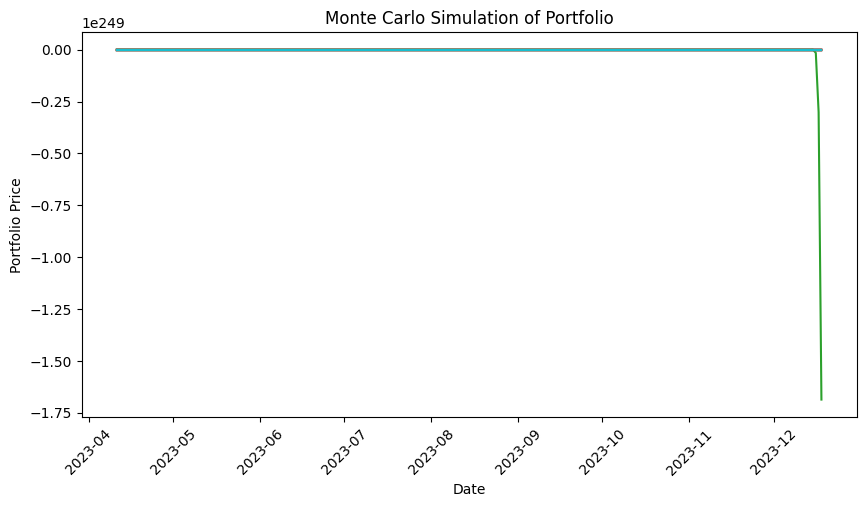

In [8]:
# Assuming 'price_data' is our DataFrame with stock prices
returns = price_data.pct_change().dropna()

# Historical mean and standard deviation
mean_returns = returns.mean()
std_dev_returns = returns.std()

# Number of iterations for the Monte Carlo simulation
num_simulations = 10
num_days = 252  # Typically the number of trading days in a year

# Start date for the simulation (the day after the last date in your data)
start_date = price_data.index.max() + timedelta(days=1)

# Running simulations
simulation_results = {}
for x in range(num_simulations):
    price_series = []

    # Starting price for each stock
    price = price_data.iloc[-1]
    price_series.append(price)

    for y in range(num_days - 1):  # Adjusted to simulate for num_days - 1
        price = price_series[-1] * (1 + np.random.normal(mean_returns, std_dev_returns))
        price_series.append(price)

    dates = pd.date_range(start_date, periods=num_days)  # This creates an index of length num_days
    simulation_results[x] = pd.DataFrame(price_series, index=dates)

# Convert the results dictionary to a DataFrame
simulation_df = pd.concat(simulation_results, axis=1)

# Plotting the simulations
plt.figure(figsize=(10,5))
for i in range(num_simulations):
    plt.plot(simulation_df[i])
plt.title('Monte Carlo Simulation of Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Price')
plt.xticks(rotation=45)
plt.show()


In [9]:
simulation_df

0                                           1  \
                     AAPL           MSFT         GOOGL           AAPL   
2023-04-11   8.621915e+01   9.729195e+01  9.608347e+01   8.621915e+01   
2023-04-12   5.514873e+02   6.378851e+02  6.154493e+00  -1.866870e+02   
2023-04-13   6.932531e+01  -7.198621e+03  2.551343e+00   3.436020e+02   
2023-04-14  -3.273707e+02  -6.145531e+04 -4.642121e+00   3.708760e+03   
2023-04-15  -5.345216e+03  -1.238590e+06  2.274291e+01   9.617238e+04   
...                   ...            ...           ...            ...   
2023-12-14 -4.539719e+226  5.798838e+184  5.744469e+82 -2.237431e+239   
2023-12-15 -1.309997e+228  6.664481e+185  2.735620e+83  2.112206e+240   
2023-12-16  8.582503e+228  9.658415e+186  7.762178e+83 -2.331930e+241   
2023-12-17  2.230840e+230  2.487172e+188  8.098194e+83 -3.133414e+242   
2023-12-18 -5.691384e+230 -1.306381e+189  1.290262e+84  7.729189e+242   

                                                     2                 \
                     MSFT         GOOGL           AAPL           MSFT   
2023-04-11   9.729195e+01  9.608347e+01   8.621915e+01   9.729195e+01   
2023-04-12   7.713274e+02  1.527674e+02   3.747908e+03   2.172021e+03   
2023-04-13   1.197355e+04 -1.655604e+02   1.238917e+05   1.713078e+04   
2023-04-14  -3.803401e+03 -7.480844e+02   1.402791e+06   5.205105e+04   
2023-04-15  -3.005489e+03 -2.665857e+03  -1.455166e+07   6.607997e+05   
...                   ...           ...            ...            ...   
2023-12-14  3.356988e+194  1.418144e+81  9.262168e+233  6.257482e+194   
2023-12-15 -3.586564e+195  1.040793e+82 -8.787060e+234 -7.862864e+195   
2023-12-16  1.095274e+196  2.909121e+82  2.366505e+235  2.517404e+196   
2023-12-17  1.417453e+196  1.056063e+83 -2.411813e+236  2.741222e+197   
2023-12-18 -9.080867e+196  7.270213e+83 -1.475799e+237 -1.420996e+198   

                                      3  ...             6              7  \
                   GOOGL           AAPL  ...         GOOGL           AAPL   
2023-04-11  9.608347e+01   8.621915e+01  ...  9.608347e+01   8.621915e+01   
2023-04-12  2.455031e+02  -6.359523e+02  ...  8.888161e+02  -1.953793e+03   
2023-04-13  1.150396e+02  -1.195680e+04  ...  1.024547e+03   1.611946e+04   
2023-04-14 -1.422128e+02  -1.367347e+05  ...  7.823027e+03   2.438300e+05   
2023-04-15  5.896356e+02   1.237276e+05  ...  2.002054e+04   1.951486e+06   
...                  ...            ...  ...           ...            ...   
2023-12-14 -1.214400e+76  3.236248e+237  ...  2.916240e+87  1.168284e+228   
2023-12-15 -8.781559e+75  6.826260e+238  ...  2.295074e+88  8.692160e+227   
2023-12-16 -4.185611e+76  1.574066e+240  ...  6.267483e+88  1.863410e+229   
2023-12-17 -3.167790e+77 -1.294489e+241  ...  6.574194e+89  2.340290e+230   
2023-12-18  6.758300e+77 -7.370391e+241  ... -1.030633e+90 -5.509765e+231   

                                                     8                 \
                     MSFT         GOOGL           AAPL           MSFT   
2023-04-11   9.729195e+01  9.608347e+01   8.621915e+01   9.729195e+01   
2023-04-12   1.473471e+03  7.149124e+01   2.165683e+03  -2.694459e+02   
2023-04-13   1.492755e+04  5.763901e-01  -6.207486e+02  -7.568606e+02   
2023-04-14   9.930074e+04 -1.737270e-02   1.081645e+04  -4.851552e+03   
2023-04-15  -1.176716e+06 -6.182685e-02   1.586643e+05  -4.579285e+04   
...                   ...           ...            ...            ...   
2023-12-14  1.155788e+203 -7.255663e+68 -3.788975e+235  1.073670e+202   
2023-12-15 -6.630303e+203 -6.368004e+68 -2.712166e+236 -8.708044e+202   
2023-12-16 -1.143989e+205 -3.656040e+69  1.450751e+237 -1.514279e+204   
2023-12-17  1.889698e+205 -1.300351e+70 -1.750001e+238  1.070213e+205   
2023-12-18  3.013764e+206  2.116862e+70  7.485382e+238  9.157307e+205   

                                      9                               
                   GOOGL           AAPL           MSFT         GOOGL  
2023-04-11  9.608347e+01   8.6